In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_dicts = []
for i in range(1, 1000+1):
    if i % 100 == 0:
        print(i, '...')
    myfile = open('./20200529_compiled/file'+str(i)+'.txt', 'r')
    started = False
    file_dict = {}
    for line in myfile.readlines():
        if started:
            name = line[:line.find(':')]
            obj = eval(line[line.find(':')+1:])
            if i == 1:
                print(name)
                print(obj)
            file_dict[name] = obj
        else:
            started = True
    file_dicts.append(file_dict)
    myfile.close()

xyz_boxes
[([-350.0, -116.66666666666666], [-350.0, -116.66666666666666], [0.0, 400.0]), ([-350.0, -116.66666666666666], [-350.0, -116.66666666666666], [400.0, 800.0]), ([-350.0, -116.66666666666666], [-350.0, -116.66666666666666], [800.0, 1200.0]), ([-350.0, -116.66666666666666], [-116.66666666666666, 116.66666666666669], [0.0, 400.0]), ([-350.0, -116.66666666666666], [-116.66666666666666, 116.66666666666669], [400.0, 800.0]), ([-350.0, -116.66666666666666], [-116.66666666666666, 116.66666666666669], [800.0, 1200.0]), ([-350.0, -116.66666666666666], [116.66666666666669, 350.0], [0.0, 400.0]), ([-350.0, -116.66666666666666], [116.66666666666669, 350.0], [400.0, 800.0]), ([-350.0, -116.66666666666666], [116.66666666666669, 350.0], [800.0, 1200.0]), ([-116.66666666666666, 116.66666666666669], [-350.0, -116.66666666666666], [0.0, 400.0]), ([-116.66666666666666, 116.66666666666669], [-350.0, -116.66666666666666], [400.0, 800.0]), ([-116.66666666666666, 116.66666666666669], [-350.0, -116.66

100 ...
200 ...
300 ...
400 ...
500 ...
600 ...
700 ...
800 ...
900 ...
1000 ...


In [3]:
len(file_dicts)

1000

In [4]:
xyz_boxes = file_dicts[0]['xyz_boxes']

In [5]:
rings = list(file_dicts[0]['S1_matrix_PMT'].keys())
rings.sort()
print(rings)

[125.0, 217.0, 250.0, 331.0, 375.0, 433.0, 451.0, 500.0]


In [6]:
box_totals = [sum([file_dict['Num_events_per_box'][box_i] for file_dict in file_dicts]) for box_i in range(len(xyz_boxes))]
print(box_totals)
print('Length =', len(box_totals))

[23816, 23876, 23893, 23862, 23635, 23947, 23896, 23705, 23995, 23758, 23775, 23832, 23517, 23603, 23586, 24029, 23677, 23634, 23776, 23656, 23864, 23862, 23810, 23309, 23811, 23865, 23717]
Length = 27


In [8]:
# Pseudoaverage - weighted by file, instead of numbe of events
S1_matrix_PMT_pavg = {ring:sum([np.array(file_dict['S1_matrix_PMT'][ring]) for file_dict in file_dicts])/len(file_dicts) for ring in rings}
print(S1_matrix_PMT_pavg)

{125.0: array([0.31143429, 0.36577786, 0.44730334, 0.31159901, 0.36689579,
       0.46502473, 0.31314703, 0.36460798, 0.44594309, 0.31001373,
       0.36772871, 0.46420969, 0.32112231, 0.37388205, 0.49372836,
       0.31321256, 0.37071368, 0.46305418, 0.30567778, 0.36372951,
       0.45157852, 0.31647396, 0.36863241, 0.46088252, 0.30612215,
       0.36716322, 0.44915923]), 217.0: array([0.30216917, 0.35612075, 0.44446637, 0.30173984, 0.35747078,
       0.45061564, 0.30746718, 0.35549143, 0.44213212, 0.29987349,
       0.3566086 , 0.44936844, 0.30706162, 0.35801326, 0.4557204 ,
       0.30655891, 0.3563996 , 0.44667774, 0.29957507, 0.35219806,
       0.43756406, 0.30483514, 0.3597442 , 0.44576842, 0.29855403,
       0.35634894, 0.4406661 ]), 250.0: array([0.29864975, 0.34687341, 0.43422378, 0.29872873, 0.3524705 ,
       0.43869881, 0.30871181, 0.34832103, 0.43690086, 0.30020126,
       0.35330839, 0.43953396, 0.30091234, 0.35325792, 0.44164863,
       0.30130857, 0.35051512, 0.44057269

In [9]:
# Pseudoaverage - weighted by file, instead of numbe of events
S2_matrix_PMT_pavg = {ring:sum([np.array(file_dict['S2_matrix_PMT'][ring]) for file_dict in file_dicts])/len(file_dicts) for ring in rings}
print(S2_matrix_PMT_pavg)

{125.0: array([145.93732967, 140.98144964, 136.38047866, 157.14308725,
       152.0566708 , 147.01447144, 145.84109535, 141.09153623,
       136.21800594, 157.33839182, 152.1369455 , 147.11881021,
       169.11452277, 163.60531074, 158.27873404, 157.14970062,
       152.12761727, 147.13566878, 145.79069139, 141.10760933,
       136.28779646, 157.1685933 , 152.17599724, 147.02038672,
       145.81592374, 140.9510052 , 136.24696999]), 217.0: array([144.08329024, 139.19134964, 134.59293236, 153.59302046,
       148.5765358 , 143.68795637, 143.95796908, 139.34494515,
       134.50773747, 153.61924131, 148.59393475, 143.71523664,
       160.17537843, 154.99715465, 149.88589634, 153.64605185,
       148.61781581, 143.75129897, 143.9193828 , 139.28680865,
       134.5147847 , 153.58482604, 148.65336554, 143.67706162,
       143.96936532, 139.0971059 , 134.488247  ]), 250.0: array([143.07420449, 138.17150099, 133.67016689, 151.58157782,
       146.75298672, 141.85071909, 142.99443213, 138.3964

In [10]:
S1s_SiPMs_avg = [ sum([file_dict['S1s_SiPMs'][i_box]*file_dict['Num_events_per_box'][i_box] for file_dict in file_dicts])/box_totals[i_box] for i_box in range(len(xyz_boxes)) ]
print(S1s_SiPMs_avg)

[3.1260077258985555, 1.8170128999832467, 1.2602435859875278, 3.0525102673707147, 1.8143854453141528, 1.2590303587088154, 3.2088215600937398, 1.8164522252689306, 1.2653052719316524, 3.039944439767657, 1.8018086225026289, 1.2750923128566634, 3.0153505974401495, 1.8223530907088081, 1.262274230475706, 3.0617170918473513, 1.8255691177091693, 1.2565371921807564, 3.0663273889636606, 1.826175177544809, 1.2532685216225277, 3.051043500125723, 1.8162116757664846, 1.2544939722853834, 3.0916803158204194, 1.8123192960402263, 1.253025256145381]


In [11]:
S2s_SiPMs_avg = [ sum([file_dict['S2s_SiPMs'][i_box]*file_dict['Num_events_per_box'][i_box] for file_dict in file_dicts])/box_totals[i_box] for i_box in range(len(xyz_boxes)) ]
print(S2s_SiPMs_avg)

[2327.5361941551896, 2250.3929468922765, 2176.424392081363, 2346.8098650574134, 2270.736492489951, 2196.180774209713, 2327.1001841312354, 2251.615397595444, 2176.1818712231716, 2346.4231837696775, 2269.8145110410096, 2196.4485146022157, 2336.8307182038525, 2260.57619794094, 2187.18426185025, 2346.021890215989, 2270.463361067703, 2194.9909875602943, 2328.3389552489907, 2252.3106611430503, 2176.1965303385855, 2346.540734221775, 2269.590466190676, 2196.1074263160153, 2326.6713283776407, 2251.1099518122774, 2176.446472994055]


In [12]:
Mean_max_sipm_box_avg = [ sum([file_dict['Mean_max_sipm_box'][i_box]*file_dict['Num_events_per_box'][i_box] for file_dict in file_dicts])/box_totals[i_box] for i_box in range(len(xyz_boxes)) ]
print(Mean_max_sipm_box_avg)

[130.09107322808197, 103.56630088792093, 86.9479345414975, 130.20471879976532, 103.37000211550667, 86.7235144276945, 130.0543187144292, 103.53330520987133, 86.88847676599292, 129.9619496590622, 103.23116719242903, 86.6958291372944, 129.813879321342, 103.23272465364572, 86.76155346391927, 129.71517749386157, 103.56451408539934, 86.6968350681222, 130.18009757738898, 103.69153703077443, 87.01319979886021, 130.01822982147348, 103.28416631667366, 86.77420738770432, 130.23039771534164, 103.59455269222711, 87.01062528987646]


In [13]:
xy_bins = set({})
z_bins = set({})
for box in xyz_boxes:
    xb = tuple(box[0])
    yb = tuple(box[1])
    zb = tuple(box[2])
    xy_bins.add((xb, yb))
    z_bins.add(zb)

In [14]:
import itertools as it
def get_index_from_box(mybox, myboxes):
    for myi_box, mytest_box in zip(range(len(myboxes)), myboxes):
        box_equal = True
        for i, j in it.product(range(3), range(2)):
            if not mytest_box[i][j] == mybox[i][j]:
                box_equal = False
        if box_equal:
            return myi_box
    return -1

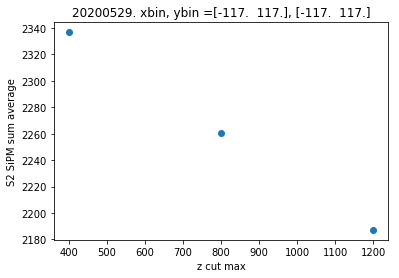

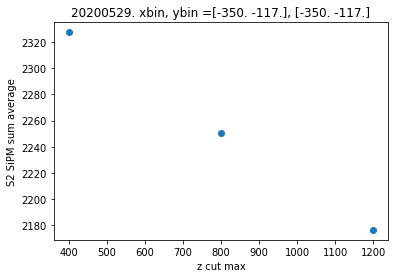

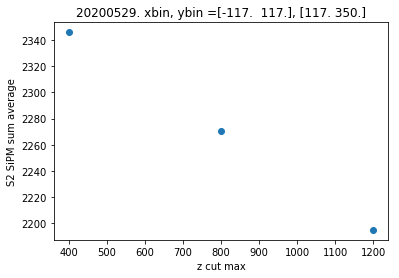

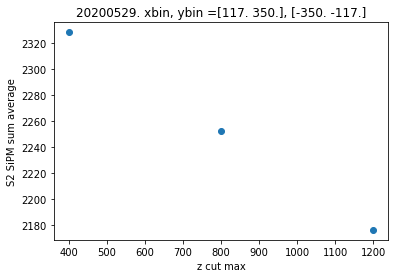

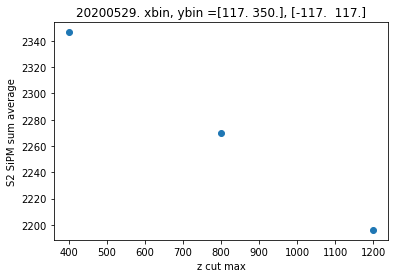

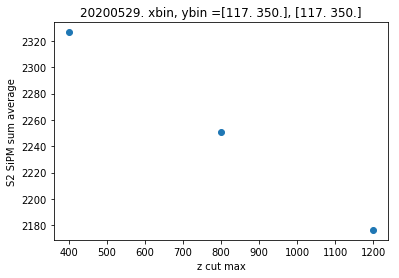

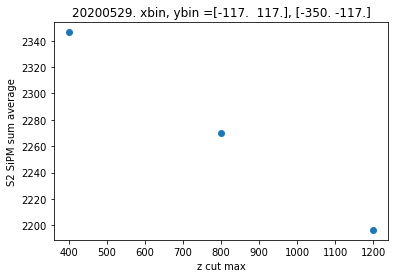

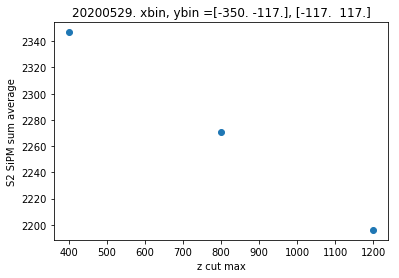

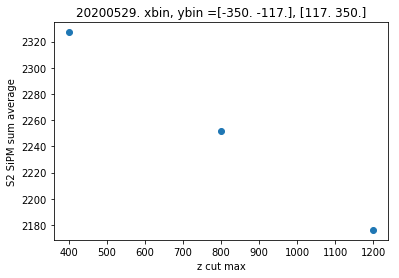

In [15]:
run_no = '20200529'

for xyb in xy_bins:
    S2s_SiPMs_avg_vZ = []
    zs = []
    for zb in z_bins:
        full_box = xyb + (zb,)
        box_i = get_index_from_box(full_box, xyz_boxes)
        zs.append(zb[1])
        S2s_SiPMs_avg_vZ.append(S2s_SiPMs_avg[box_i])
    plt.plot(zs, S2s_SiPMs_avg_vZ, 'o')
    plt.title(run_no+'. xbin, ybin ='+str(np.round(np.array(xyb))[0])+', '+str(np.round(np.array(xyb))[1]))
    plt.xlabel('z cut max')
    plt.ylabel('S2 SiPM sum average')
    plt.show()

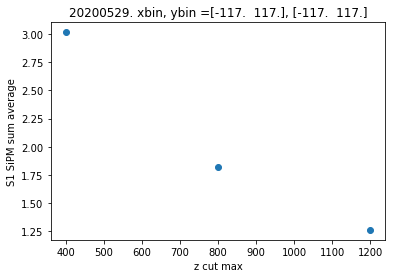

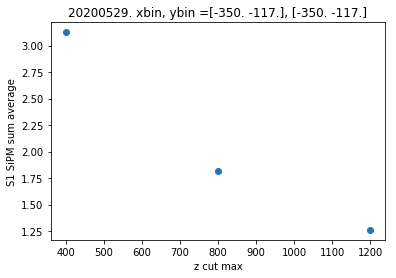

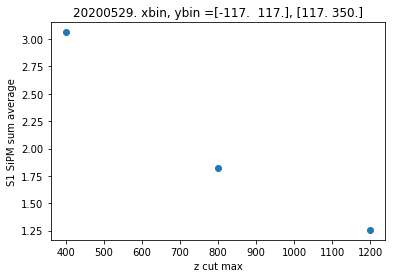

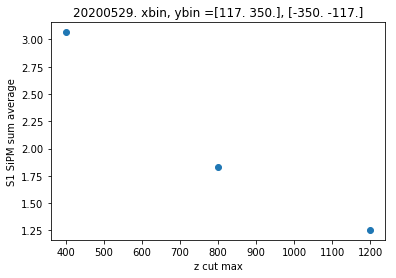

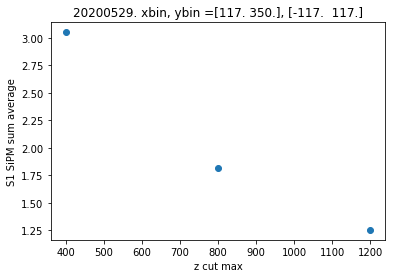

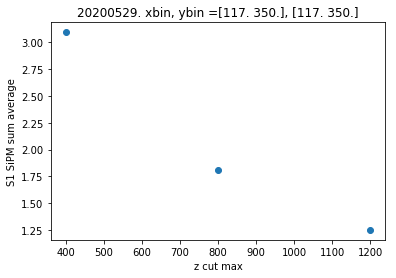

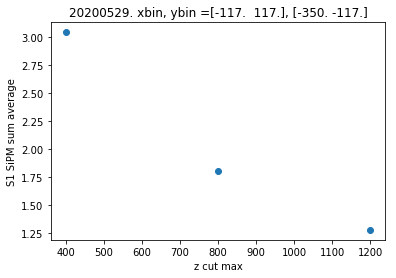

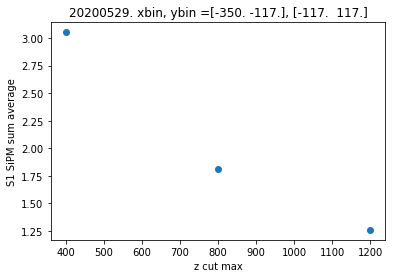

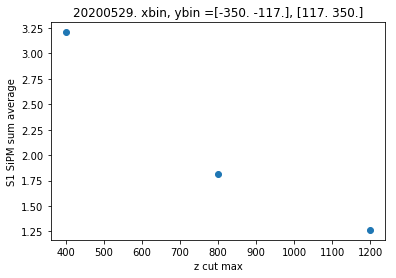

In [16]:
for xyb in xy_bins:
    S1s_SiPMs_avg_vZ = []
    zs = []
    for zb in z_bins:
        full_box = xyb + (zb,)
        box_i = get_index_from_box(full_box, xyz_boxes)
        zs.append(zb[1])
        S1s_SiPMs_avg_vZ.append(S1s_SiPMs_avg[box_i])
    plt.plot(zs, S1s_SiPMs_avg_vZ, 'o')
    plt.title(run_no+'. xbin, ybin ='+str(np.round(np.array(xyb))[0])+', '+str(np.round(np.array(xyb))[1]))
    plt.xlabel('z cut max')
    plt.ylabel('S1 SiPM sum average')
    plt.show()

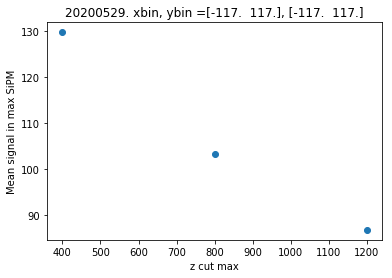

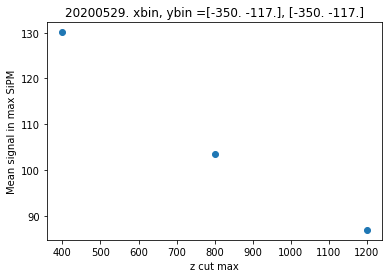

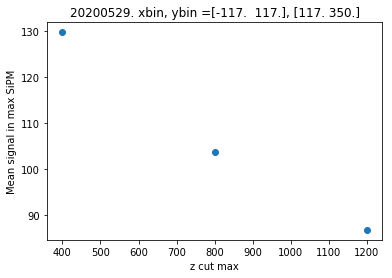

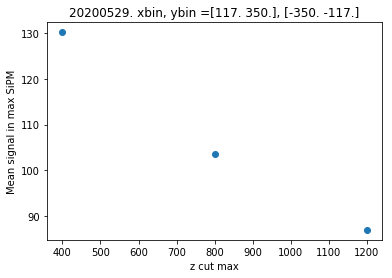

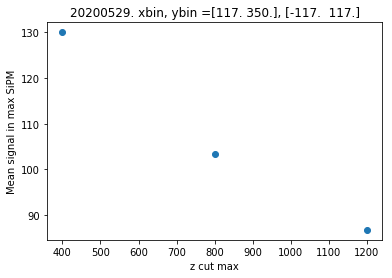

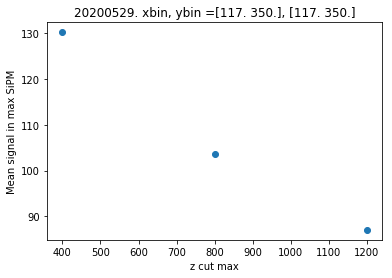

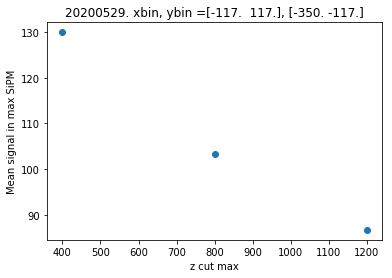

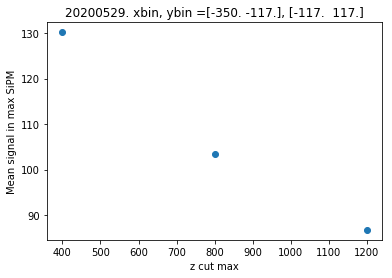

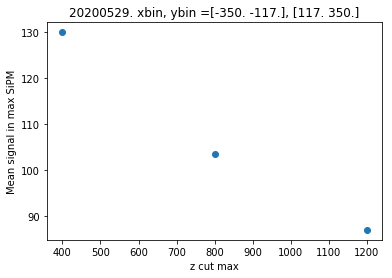

In [17]:
for xyb in xy_bins:
    Mean_max_sipm_box_avg_vZ = []
    zs = []
    for zb in z_bins:
        full_box = xyb + (zb,)
        box_i = get_index_from_box(full_box, xyz_boxes)
        zs.append(zb[1])
        Mean_max_sipm_box_avg_vZ.append(Mean_max_sipm_box_avg[box_i])
    plt.plot(zs, Mean_max_sipm_box_avg_vZ, 'o')
    plt.title(run_no+'. xbin, ybin ='+str(np.round(np.array(xyb))[0])+', '+str(np.round(np.array(xyb))[1]))
    plt.xlabel('z cut max')
    plt.ylabel('Mean signal in max SiPM')
    plt.show()

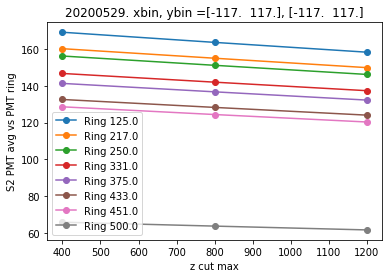

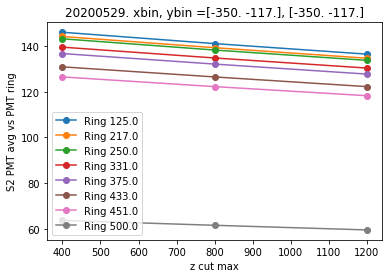

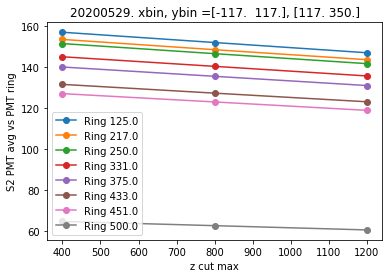

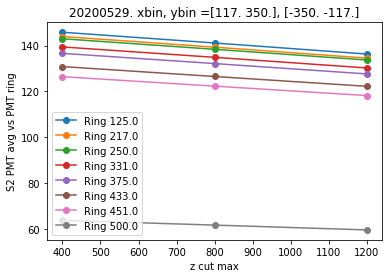

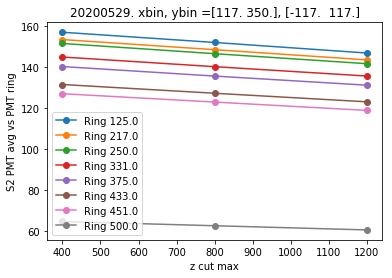

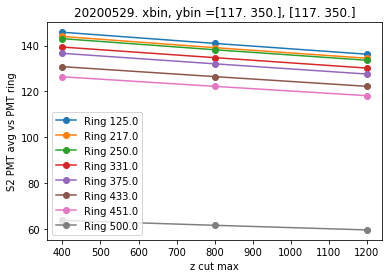

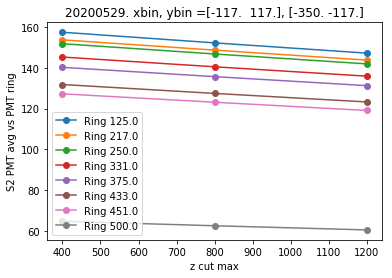

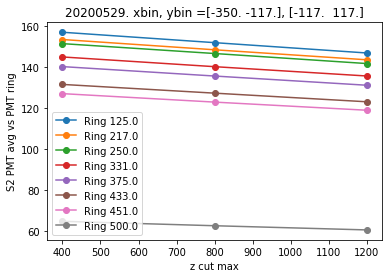

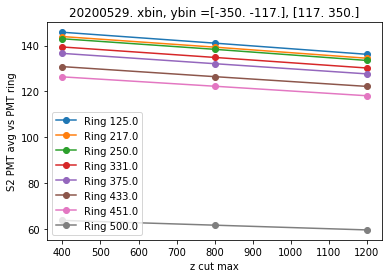

In [18]:
for xyb in xy_bins:
    for ring in rings:
        S2_matrix_PMT_pavg_ring_vZ = []
        zs = []
        for zb in z_bins:
            full_box = xyb + (zb,)
            zs.append(zb[1])
            box_i = get_index_from_box(full_box, xyz_boxes)
            S2_matrix_PMT_pavg_ring_vZ.append(S2_matrix_PMT_pavg[ring][box_i])
        zs, S2_matrix_PMT_pavg_ring_vZ = zip(*sorted(zip(zs, S2_matrix_PMT_pavg_ring_vZ)))
        plt.plot(zs, S2_matrix_PMT_pavg_ring_vZ, 'o-', label = 'Ring '+str(ring))
    plt.title(run_no+'. xbin, ybin ='+str(np.round(np.array(xyb))[0])+', '+str(np.round(np.array(xyb))[1]))
    plt.xlabel('z cut max')
    plt.ylabel('S2 PMT avg vs PMT ring')
    plt.legend()
    plt.show()

(0.3211223058452633, 0.3738820517929949, 0.4937283636794839)
(0.30706162120525654, 0.3580132591339083, 0.45572040403181535)
(0.30091233730502925, 0.35325791798014716, 0.4416486260773966)
(0.2859700436228001, 0.3331796760901831, 0.40605547777192735)
(0.27700224086222774, 0.3235775290350507, 0.3899599734593724)
(0.2590573340492923, 0.3011346538322509, 0.35859494624791494)
(0.25167348040437465, 0.2871435059688635, 0.3415817160962464)
(0.1289144363141691, 0.1471414319865498, 0.16778348615797928)


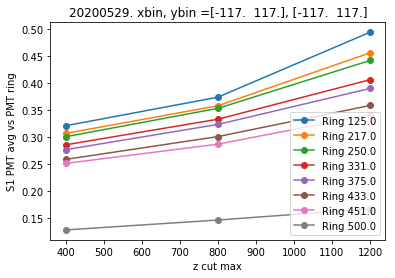

(0.31143429109492593, 0.3657778555837025, 0.4473033449222661)
(0.3021691654373336, 0.35612075312795394, 0.44446637292247193)
(0.29864974595817273, 0.34687341081052303, 0.43422378267438305)
(0.28739670025523795, 0.3333767845595475, 0.4167004086740237)
(0.27813461308094756, 0.3268292343549511, 0.40502664865081206)
(0.2701619437856947, 0.3075684321013943, 0.37728404090277157)
(0.2597959859388233, 0.29504423632661503, 0.35819418400647646)
(0.13280751544416736, 0.15199625684421575, 0.1773865952583822)


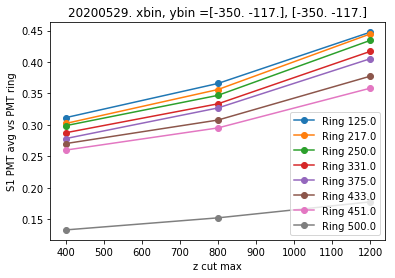

(0.31321255849093516, 0.3707136796521361, 0.46305418060846754)
(0.3065589068507854, 0.3563996006838817, 0.4466777394065751)
(0.3013085685063017, 0.35051512361721315, 0.44057268997679444)
(0.2895395131076765, 0.33478104114948193, 0.4140805903474065)
(0.27982039828886285, 0.320242641538511, 0.39685285658534925)
(0.2632862070489529, 0.3010024707994725, 0.36814114580502877)
(0.2524752373211345, 0.29069566341591596, 0.3498682343140053)
(0.13003345792943125, 0.1499975028489389, 0.17390452041752336)


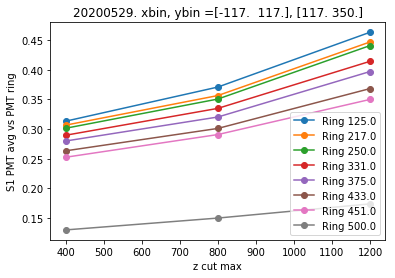

(0.30567777685822944, 0.36372951169489826, 0.4515785246556415)
(0.29957506873189693, 0.35219805513776153, 0.43756406433357414)
(0.29688038298609143, 0.34904987751793776, 0.4324553729200029)
(0.2884044573192695, 0.33483326052109436, 0.41708288271918564)
(0.28052375518510325, 0.32411485744412355, 0.40237672055137397)
(0.2654587182472074, 0.30548352299775317, 0.376205052718706)
(0.2593974536418296, 0.2944225580752457, 0.35788799632333157)
(0.1312964656109285, 0.14921484238285815, 0.17798973698481435)


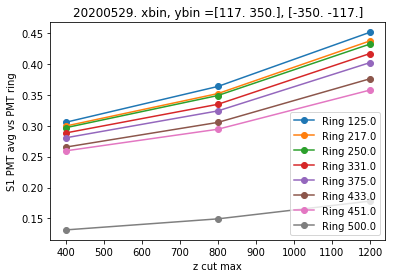

(0.3164739589352888, 0.36863241214028647, 0.46088252311599326)
(0.3048351424934946, 0.3597442028853199, 0.4457684249178801)
(0.3001725021487967, 0.35428222173715646, 0.4393501117906353)
(0.2911798398153655, 0.33435519961018295, 0.4156684562289785)
(0.2809226766343326, 0.32314414216744064, 0.3987543624305851)
(0.26240278251945237, 0.3025356897110007, 0.3666182893593554)
(0.2556429109112151, 0.29119473693328635, 0.3484528160535443)
(0.13156637214513373, 0.14770689229850711, 0.17253621841544173)


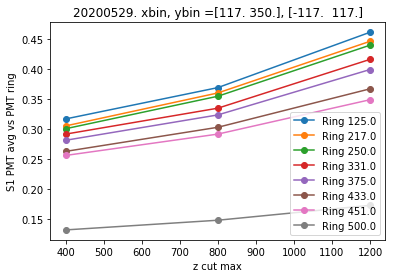

(0.3061221519094297, 0.36716321648463274, 0.4491592284432529)
(0.29855402642189793, 0.3563489355279473, 0.4406660986553947)
(0.29419832776298666, 0.3546166752694183, 0.4359194430744541)
(0.28756348099620144, 0.3340033629173154, 0.4155376170029466)
(0.28144831056778985, 0.3239484106509908, 0.40493589085681386)
(0.2658038392143233, 0.30757446985409864, 0.37738592818793953)
(0.25807329652262495, 0.29505891255033423, 0.3577669114373927)
(0.13235568262127032, 0.15144860937779306, 0.17565539262757568)


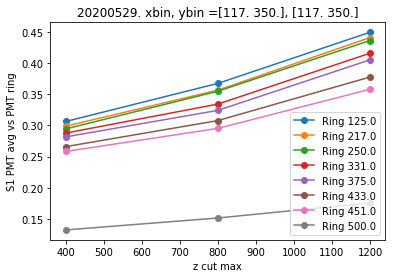

(0.3100137347785876, 0.3677287137769147, 0.4642096852513414)
(0.29987348981614365, 0.35660859806662093, 0.449368441859625)
(0.30020125852133267, 0.35330838791707553, 0.4395339620924713)
(0.2864549435113743, 0.33369898287239186, 0.4165060905488183)
(0.27665202951169504, 0.3221010050981745, 0.39984231348490185)
(0.2604435177338492, 0.29982015993842737, 0.3684709764559021)
(0.25078449441634326, 0.2928082621929358, 0.3505390640733448)
(0.12947590831391853, 0.14822660104884564, 0.1731331838261178)


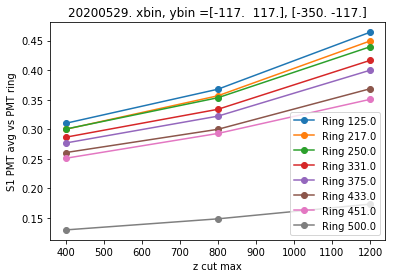

(0.3115990122171078, 0.36689578793266947, 0.465024730456674)
(0.3017398354430906, 0.3574707790782249, 0.4506156383447695)
(0.29872873206858014, 0.35247049565813465, 0.4386988075165254)
(0.2856176616644442, 0.3350268306417082, 0.41673137189586107)
(0.2771176423596637, 0.32142163922173556, 0.39925809045673066)
(0.2623500485354922, 0.30358974007950235, 0.36814291064356663)
(0.25191515278556326, 0.2911741421261624, 0.3486244879966684)
(0.12815082386539284, 0.1506397026707558, 0.17209598260388417)


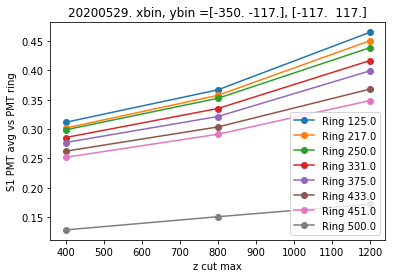

(0.3131470315137587, 0.3646079832901121, 0.44594309246249975)
(0.30746717739864543, 0.3554914329059626, 0.4421321226218607)
(0.30871180595737224, 0.34832102634862094, 0.4369008596183011)
(0.29440259789335416, 0.3355929746398409, 0.41890212573635227)
(0.28782787550053385, 0.3251247770073179, 0.40324176031355624)
(0.27606837398540046, 0.30740555421226695, 0.3760229223782435)
(0.266625564538448, 0.29603976065490123, 0.3565887294777133)
(0.13559088715561218, 0.1516655045199582, 0.17680040240947337)


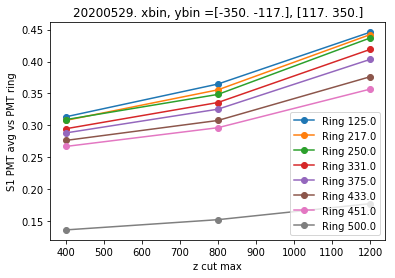

In [19]:
for xyb in xy_bins:
    for ring in rings:
        S1_matrix_PMT_pavg_ring_vZ = []
        zs = []
        for zb in z_bins:
            full_box = xyb + (zb,)
            zs.append(zb[1])
            box_i = get_index_from_box(full_box, xyz_boxes)
            S1_matrix_PMT_pavg_ring_vZ.append(S1_matrix_PMT_pavg[ring][box_i])
        zs, S1_matrix_PMT_pavg_ring_vZ = zip(*sorted(zip(zs, S1_matrix_PMT_pavg_ring_vZ)))
        plt.plot(zs, S1_matrix_PMT_pavg_ring_vZ, 'o-', label = 'Ring '+str(ring))
    plt.title(run_no+'. xbin, ybin ='+str(np.round(np.array(xyb))[0])+', '+str(np.round(np.array(xyb))[1]))
    plt.xlabel('z cut max')
    plt.ylabel('S1 PMT avg vs PMT ring')
    plt.legend()
    plt.show()
